# Dataset known as 'Heart Disease Cleveland UCI'
Code is written by Maxim Voronin

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

-- Value 0: typical angina

-- Value 1: atypical angina

-- Value 2: non-anginal pain

-- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label

condition: 0 = no disease, 1 = disease

In [1]:
# disable warnings Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [57]:
pd.isnull(df).sum()
#Suprisingly, we have no null values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [87]:
df_mean = df.mean()
print('Mean values:')
print(df_mean.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition'], axis=0))
print('-----------------')
df_median = df.median()
print('Median values:')
print(df_median.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition'], axis=0))
print('-----------------')
df_std = df.std()
print('Standart deviation values:')
print(df_std.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition'], axis=0))

Mean values:
age          54.542088
trestbps    131.693603
chol        247.350168
thalach     149.599327
oldpeak       1.055556
dtype: float64
-----------------
Median values:
age          56.0
trestbps    130.0
chol        243.0
thalach     153.0
oldpeak       0.8
dtype: float64
-----------------
Standart deviation values:
age          9.049736
trestbps    17.762806
chol        51.997583
thalach     22.941562
oldpeak      1.166123
dtype: float64


We can see that age doesn't really imply the level of cholestrol. We can see that the highest values are achieved by seniors citizens between 58 and 70 years. But we know that most people here are of that age. 

<AxesSubplot:xlabel='age', ylabel='chol'>

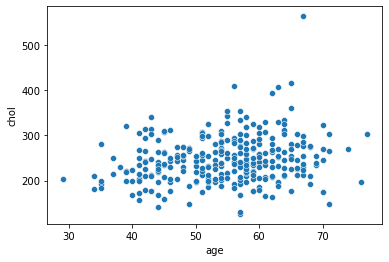

In [88]:
sns.scatterplot(data=df, x="age", y="chol")

The graph represent relation of people in condition and not with regard to sex. So it's obvious that women are either more concerned about their health or they are more susceptible to such illnesses

Males:  95
Females:  201
AxesSubplot(0.125,0.125;0.775x0.755)


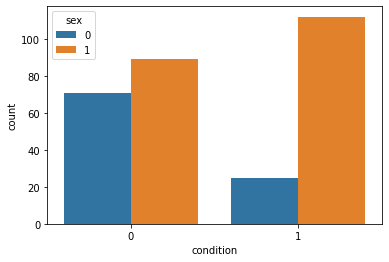

In [99]:
print('Males: ', 296 - df['sex'].sum())
print('Females: ', df['sex'].sum())
print(sns.countplot(x='condition', hue='sex', data=df))

This diagram shows on x axis cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
and the number of people with particalur pain.

<AxesSubplot:xlabel='cp', ylabel='count'>

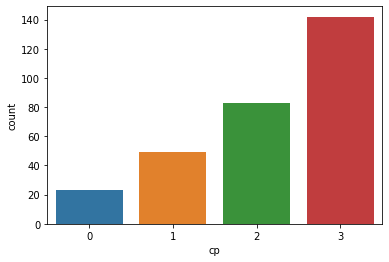

In [108]:
sns.countplot(x="cp", data=df)

What can we understand from here. Generally nothing. We can assume that  0 it's the most harmless type while 3 is the most dangerous but why probably 0 is the most dangerous but it's rare.
So let's look at graph below using regression. We are trying to find correlation: how chest pain imply condition.

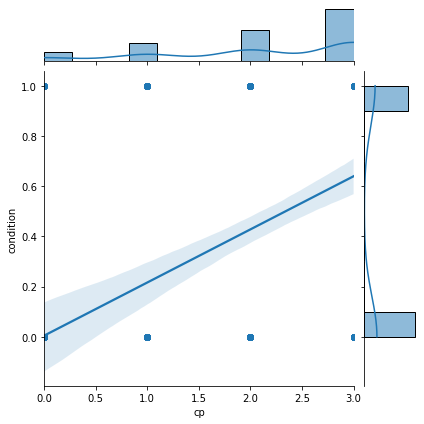

In [142]:
sns.jointplot(x='cp',y='condition',data=df ,kind='reg')

Aha. We can conclude that people (from these research) with chest pain of higher degree were more probable to have a condition.

On th graph below x-axis is resting blood pressure. On y-axis number of people green - without a condition, red - with. There are only 2 places there green colour is prevails:
1)120-150 (the most common and the healthiest one)
2)90 - 110 - we can see that less than five people had a condition vs 24 without - the best result. But I, personally, think that it's just a coincidence (as we have only 296 people) or prabably some information that we don't know. So I woudn't claim that people who have 90 - 110 the healthiest.

<AxesSubplot:>

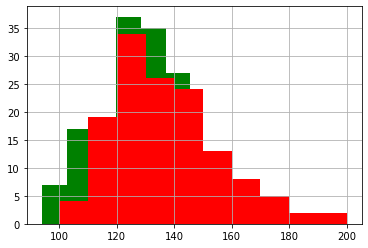

In [110]:
df[df['condition'] == 0]['trestbps'].hist(color="green",label="0")
df[df['condition'] == 1]['trestbps'].hist(color="red",label="1")

In [153]:
df[df['trestbps']<110]
#here we can see that there nothing really specail about these people 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
43,54,1,1,108,309,0,0,156,0,0.0,0,0,2,0
54,46,1,1,101,197,1,0,156,0,0.0,0,0,2,0
55,46,0,1,105,204,0,0,172,0,0.0,0,0,0,0
65,41,0,1,105,198,0,0,168,0,0.0,0,1,0,0
94,60,0,2,102,318,0,0,160,0,0.0,0,1,0,0
99,58,1,2,105,240,0,2,154,1,0.6,1,0,2,0
112,54,0,2,108,267,0,2,167,0,0.0,0,0,0,0
118,51,1,2,100,222,0,0,143,1,1.2,1,0,0,0
123,51,1,2,94,227,0,0,154,1,0.0,0,1,2,0
133,47,1,2,108,243,0,0,152,0,0.0,0,0,0,1


So, the most useless graph is here (I just wanted to create reguare plot :))
Maximum heart rate  on x-axis; resting blood pressure on y-axis
The only thing is that the less extreme spread of values of bps is beteween 138 and 180 that is other values are less stable regreading to other close values of max heart rate.

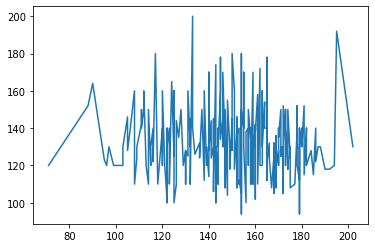

In [135]:
df_sorted_by_thalach = df.sort_values(by='thalach')
plt.plot(df_sorted_by_thalach.thalach, df_sorted_by_thalach.trestbps)

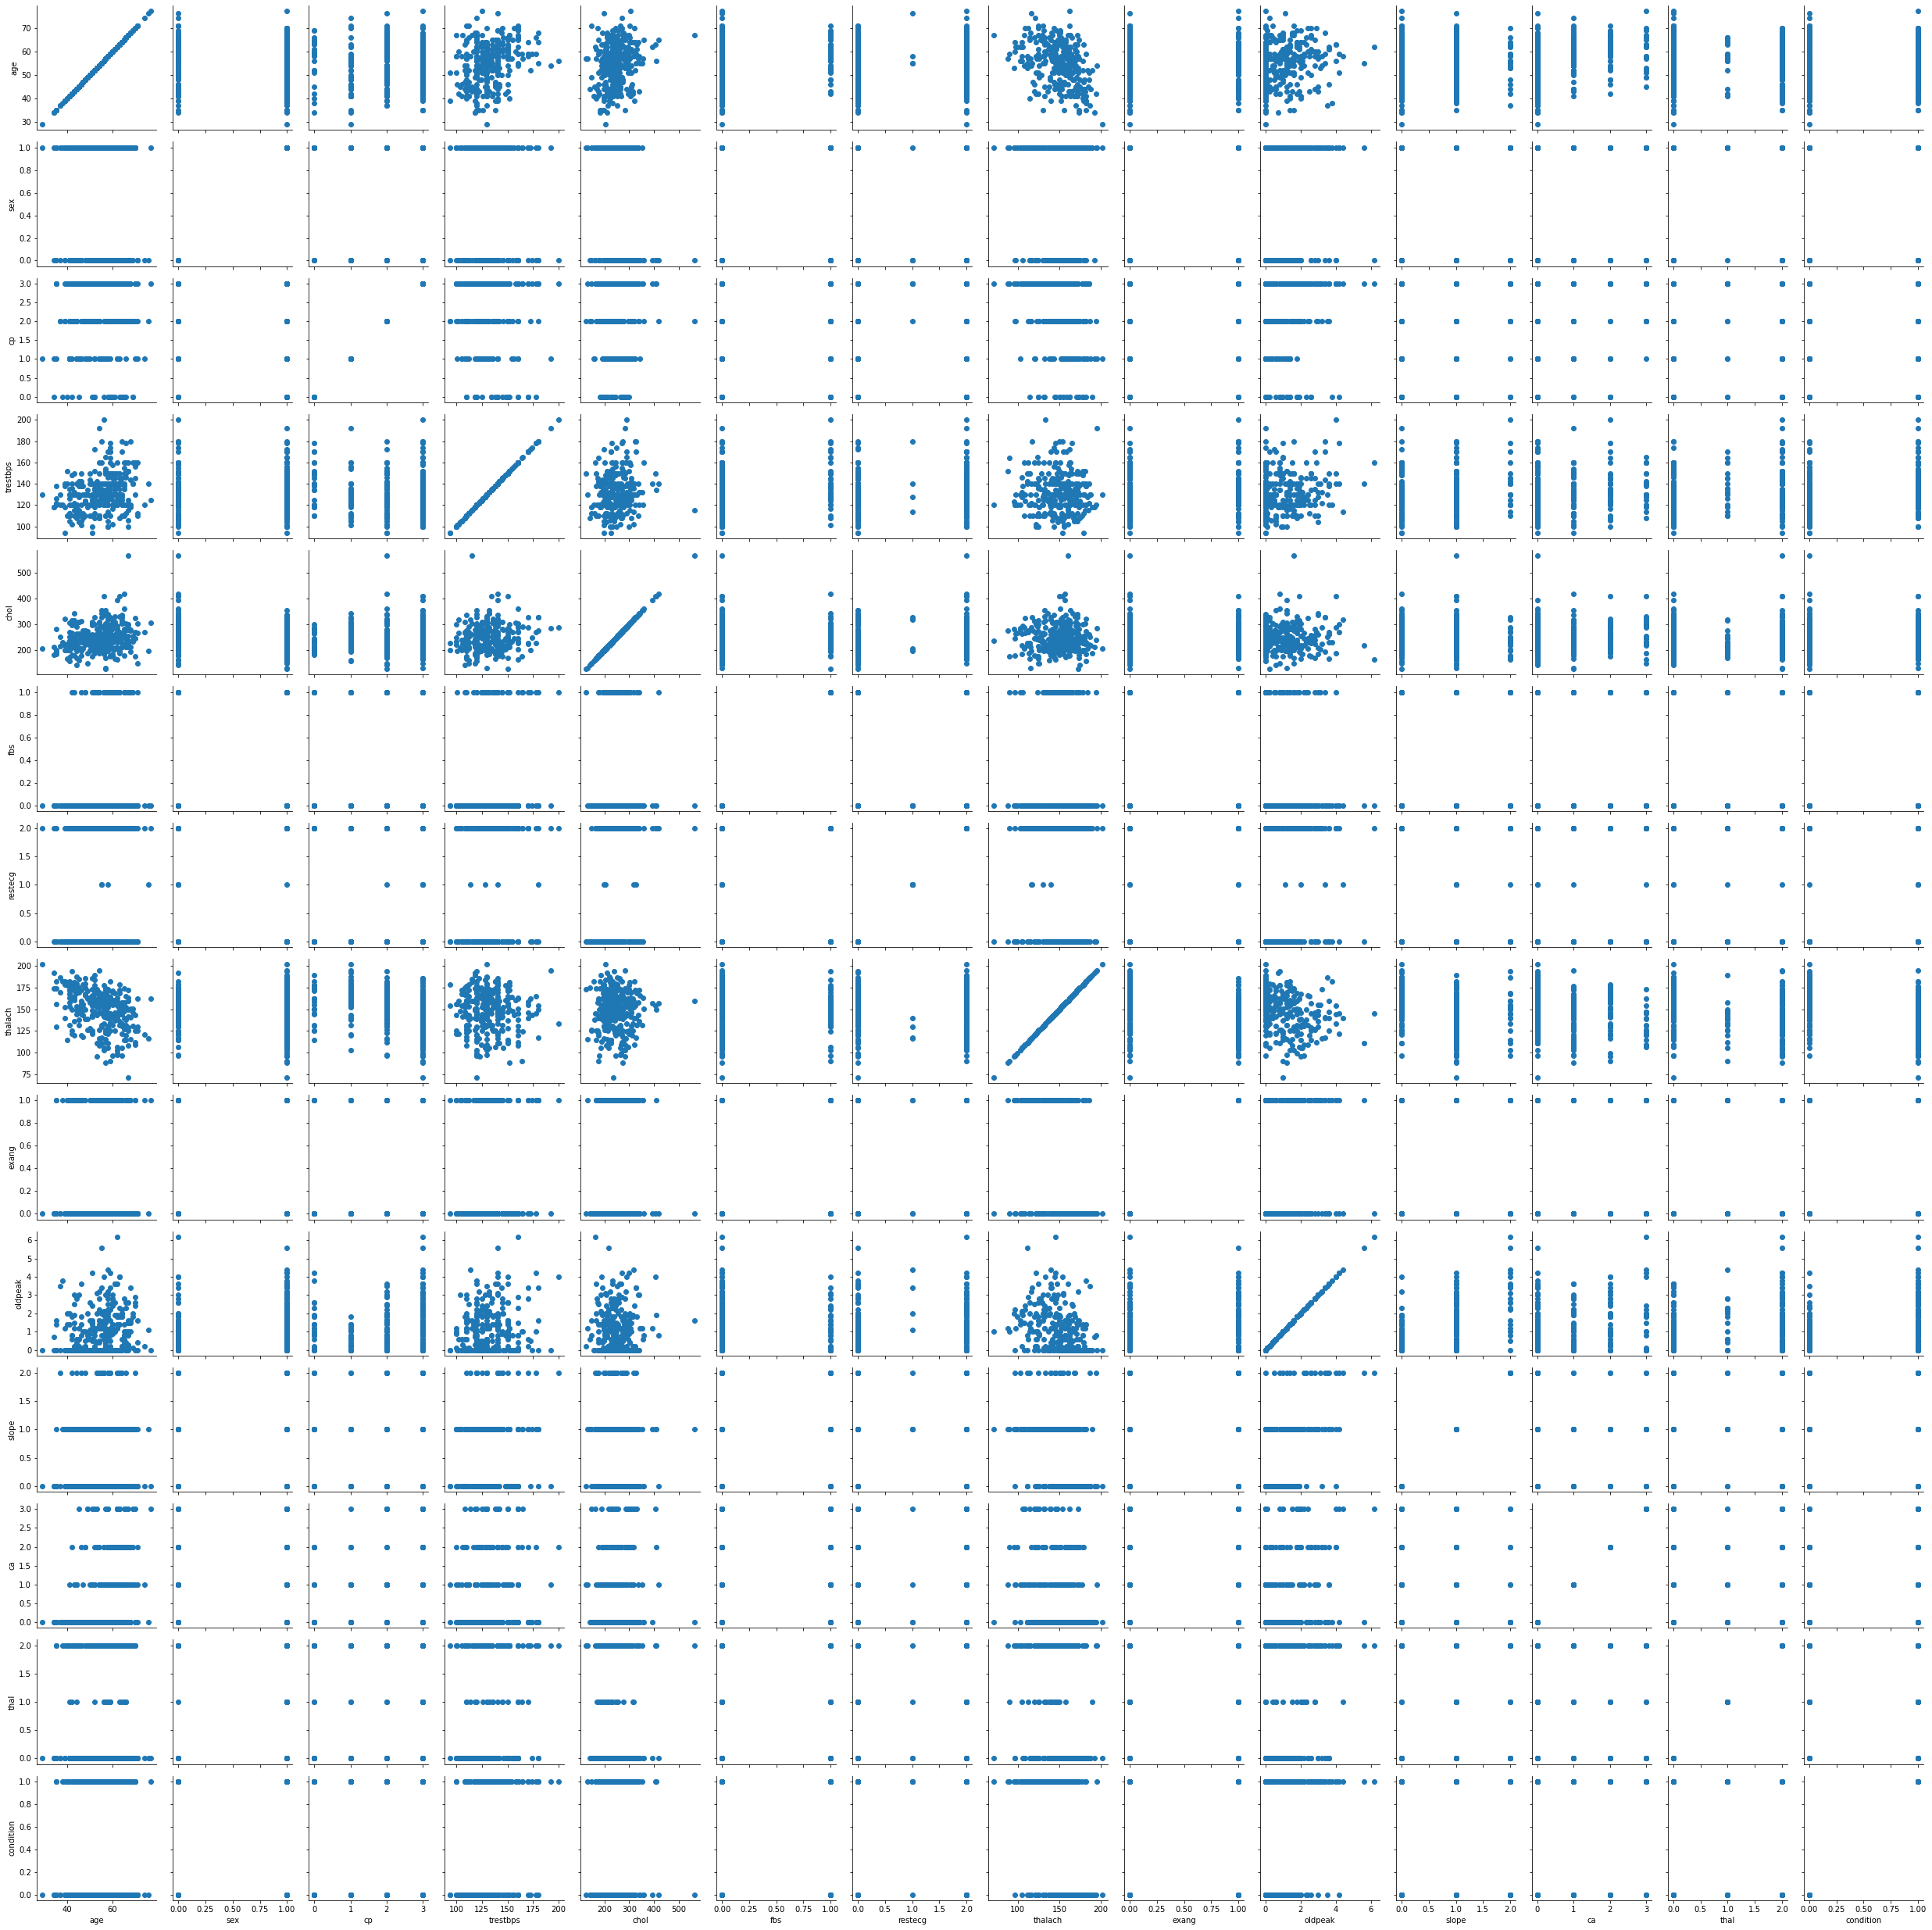

In [45]:
g = sns.PairGrid(df)
g.map(plt.scatter)
#some weird stuff

Again, let's try ti find correlation between age and trestbps, using regression.
And, I think we've found it: according to our set - the older you are the probability of high trestbps is higher.

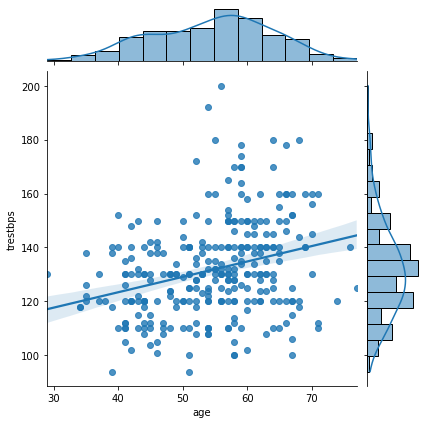

In [46]:
sns.jointplot(x='age', y='trestbps', data=df, kind='reg')

Let's do the same with oldpeak and condition.
So in our database: people with oldpeak of higher degree are more probable to have a condition.

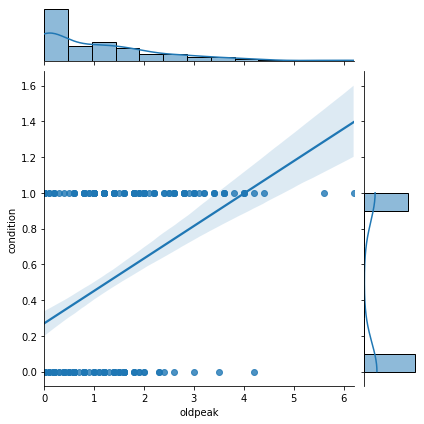

In [89]:
sns.jointplot(data=df, x='oldpeak', y='condition', kind='reg')

Again the same thing with age and condition.
Our database shows that older people have a condition more often

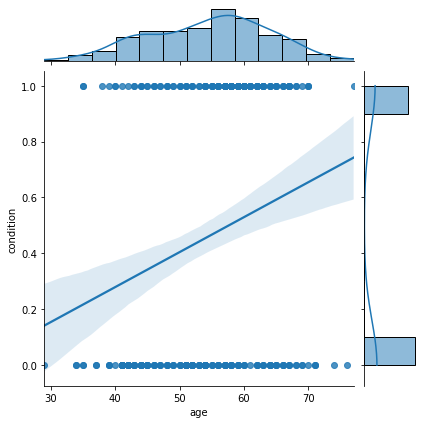

In [138]:
sns.jointplot(x='age',y='condition',data=df ,kind='reg')